<a href="https://colab.research.google.com/github/LuisEduardoRB/EDP-II/blob/main/Ecuaci%C3%B3n_de_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Con este programa podemos observar que el variar "h" y "k" nos puede devolver datos con los que no podríamos trabajar. Es importante mantener la relación de [k/h^2]<1/2 para garantizar la convergencia de los datos y, por lo tanto, de la gráfica. También podemos observar que la aproximación es bastante cercana, por lo que el uso de este método para el calculo de Ecuaciones en Diferencias se podría considerar efectivo, dependiento de los valores establecidos en "h" y "k", así como de las condiciones inciales y de frontera.

 xi    u(xi,0.5)       w_i,1000(k=0.0005)     |u-w_i,1000|     w_i,50(k=0.01)       |u-w_i,50|
------------------------------------------------------------------------------------------------------------------------
0.0   0.00000000      0.00000000                      0       0.00000000e+00                     0
0.1   0.00222241      0.00228652            6.411×10^-5      -3.02662700e+04           3.027×10^ 4
0.2   0.00422728      0.00434922            1.219×10^-4       6.05880550e+04           6.059×10^ 4
0.3   0.00581836      0.00598619            1.678×10^-4      -8.98628423e+04           8.986×10^ 4
0.4   0.00683989      0.00703719            1.973×10^-4       1.15225538e+05           1.152×10^ 5
0.5   0.00719188      0.00739934            2.075×10^-4      -1.32328393e+05           1.323×10^ 5
0.6   0.00683989      0.00703719            1.973×10^-4       1.36478816e+05           1.365×10^ 5
0.7   0.00581836      0.00598619            1.678×10^-4      -1.24251369e+05           1.24

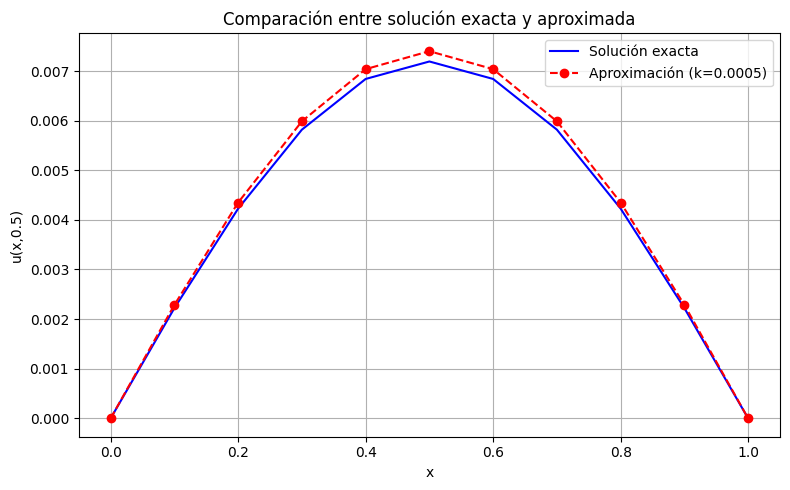

In [7]:
# Ecuación de calor 1D: u_t = u_xx en (0,1), t >= 0
# Condiciones de frontera: u(0,t)=u(1,t)=0
# Condición inicial: u(x,0)=sin(pi x)
# Tabla en t=0.5 para h=0.1 con k=0.0005 (estable) y k=0.01 (inestable)
# Gráfica: comparación entre solución exacta y aproximada

import math as ma
import matplotlib.pyplot as plt

def datos(h,k,t_final):
    """
    Resuelve la ecuación de calor 1D con esquema de Diferencias progresivas
    Parámetros:
      h: paso espacial
      k: paso temporal
      t_final: instante final
    Devuelve:
      x: nodos espaciales
      u: aproximación numérica en t_final
    """
    N=int(1.0/h)
    x=[i*h for i in range(N+1)]
    M=int(round(t_final/k))
    r=k/(h*h)

    # Condición inicial u(x,0)=sin(pi x)
    u=[ma.sin(ma.pi*xi) for xi in x]
    u[0]=0.0
    u[-1]=0.0

    # Avance en el tiempo con Diferencias progresivas
    for _ in range(M):
        nxt=u[:]
        nxt[0]=0.0
        nxt[-1]=0.0
        for i in range(1,N):
            nxt[i]=u[i]+r*(u[i+1]-2*u[i]+u[i-1])
        u=nxt
    return x,u

def solucion_exacta(x,t):
    #Solución analítica: u(x,t)=exp(-pi^2*t)*sin(pi*x)
    return [ma.exp(-ma.pi**2*t)*ma.sin(ma.pi*xi) for xi in x]

def tabla():
    #Imprime la tabla comparativa y genera la gráfica
    h=0.1
    t_final=0.5

    # Casos: estable e inestable
    x,w_est=datos(h,0.0005,t_final)
    _,w_inst=datos(h,0.01,t_final)
    u=solucion_exacta(x,t_final)

    def error(e):
        """Da formato científico al error."""
        if e==0:
            return "0"
        exp=int(ma.floor(ma.log10(abs(e))))
        mant=e/10**exp
        return f"{mant:6.3f}×10^{exp:2d}"

    print(" xi    u(xi,0.5)       w_i,1000(k=0.0005)     |u-w_i,1000|     w_i,50(k=0.01)       |u-w_i,50|")
    print("-"*120)
    for i,xi in enumerate(x):
        ue=u[i]
        we=w_est[i]
        wi=w_inst[i]
        err_e=abs(ue-we)
        err_i=abs(ue-wi)
        print(f"{xi:3.1f}  {ue: .8f}     {we: .8f}           {error(err_e):>12}      {wi: .8e}          {error(err_i):>12}")

    # Gráfica comparativa
    plt.figure(figsize=(8,5))
    plt.plot(x,u,'b-',label='Solución exacta')
    plt.plot(x,w_est,'ro--',label='Aproximación (k=0.0005)')
    plt.xlabel('x')
    plt.ylabel('u(x,0.5)')
    plt.title('Comparación entre solución exacta y aproximada')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__=="__main__":
    tabla()
